# 🧪 Preparcial – Caso de Negocio “YumFit”
## Escenario
Eres el/la **Chief Marketing Officer (CMO)** de **YumFit**, una start-up que vende snacks saludables 100 % online.  
Tu equipo de Data te entrega un dataset con historial de 150 clientes (`df`) y te aprueban un presupuesto de **US$10 000** para la próxima campaña de retención y cross-selling.

### Misión
Sigue el **paso a paso** y toma decisiones que evolucionan de lo descriptivo a la recomendación táctica:
1. Conocer la base de clientes → *EDA*  
2. Calcular **CAC** y **LTV** → *Métricas de negocio*  
3. Segmentar en **4 clusters** con *K-Means* → *Inteligencia de clientes*  
4. Evaluar el valor de cada cluster → *Trade-offs*  
5. Hacer **profiling** (nombre + storytelling) → *Comunicación*  
6. Asignar presupuesto y justificar → *Decisión ejecutiva*

---
### Instrucciones
Ejecuta cada celda, responde las preguntas (P1…P12) y prepara un informe ejecutivo breve al final.

In [2]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos (1).csv"

--2025-05-07 21:48:09--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-05-07 21:48:09--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1032085 (1008K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv’

clientes_segmento

In [3]:
import pandas as pd
df = pd.read_csv('clientes_segmentos (1).csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_cliente           15000 non-null  object
 1   edad                 15000 non-null  int64 
 2   genero               15000 non-null  object
 3   ingresos             15000 non-null  int64 
 4   plataforma           15000 non-null  object
 5   interacciones        15000 non-null  int64 
 6   compras              15000 non-null  int64 
 7   promedio_ticket      15000 non-null  int64 
 8   total_gastado        15000 non-null  int64 
 9   fecha_primer_compra  15000 non-null  object
 10  fecha_ultima_compra  15000 non-null  object
 11  dias_desde_ultima    15000 non-null  int64 
 12  recomendaciones      15000 non-null  int64 
 13  costo_adquisicion    15000 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.6+ MB


### P1. ¿Cuántos clientes hay y cómo se distribuyen por plataforma?


In [6]:
print(df.shape)
df.head()

(15000, 14)


,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,fecha_ultima_compra,dias_desde_ultima,recomendaciones,costo_adquisicion
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,2024-12-25,97,0,25
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,2025-03-08,24,0,24
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,2025-03-05,27,1,16
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,2025-02-16,44,0,29
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,2025-02-07,53,0,32


### P2. ¿Cómo es la distribución de la edad? ¿Hay outliers?


In [8]:
describe = df['edad'].describe()
print(describe)

count    15000.000000
mean        32.996733
std         11.385454
min         16.000000
25%         24.000000
50%         31.000000
75%         39.000000
max         60.000000
Name: edad, dtype: float64


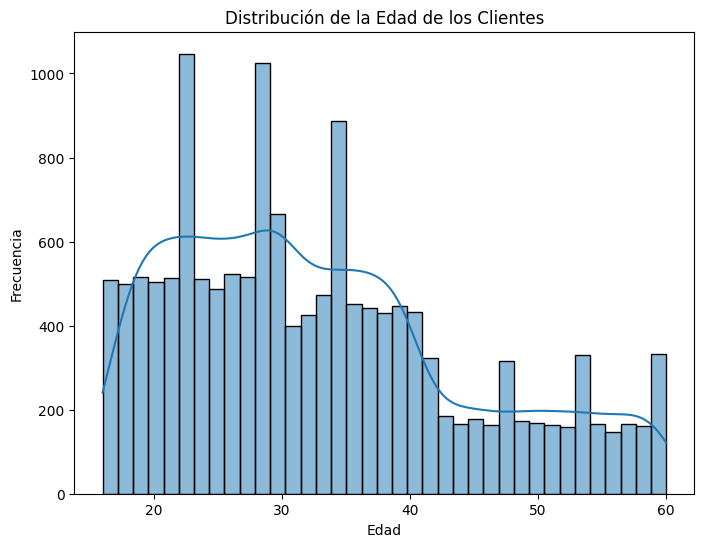

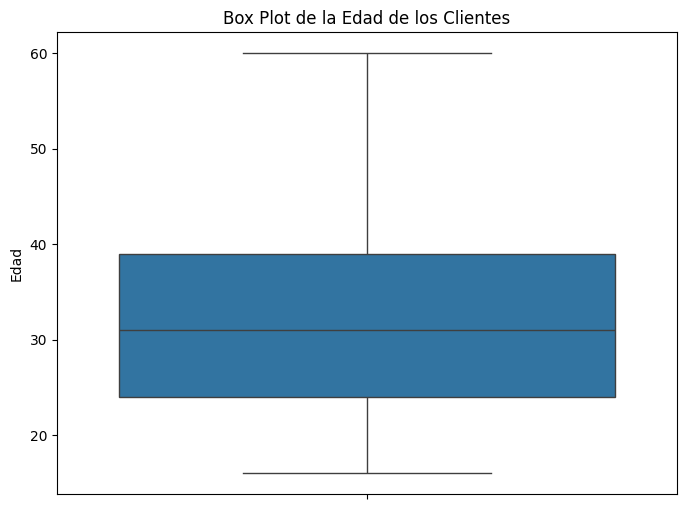

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['edad'], kde=True)
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(8, 6))
colors = ['blue', 'orange']
sns.boxplot(y=df['edad'])
plt.title('Box Plot de la Edad de los Clientes')
plt.ylabel('Edad')
plt.show()

### P3. ¿Existe correlación entre ingresos y total_gastado?


In [11]:
correlation = df['ingresos'].corr(df['total_gastado'])

print(f"La correlación entre ingresos y total_gastado es: {correlation}")

La correlación entre ingresos y total_gastado es: 0.24997121321816387


La correlación entre ingresos y total_gastado es: 0.24997121321816387


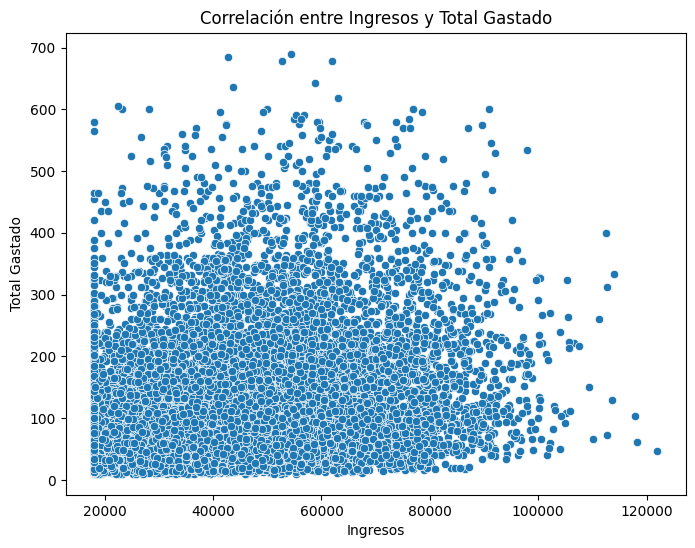

In [26]:
correlation = df['ingresos'].corr(df['total_gastado'])

print(f"La correlación entre ingresos y total_gastado es: {correlation}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ingresos', y='total_gastado', data=df)
plt.title('Correlación entre Ingresos y Total Gastado')
plt.xlabel('Ingresos')
plt.ylabel('Total Gastado')
plt.show()

#### 💵 FASE 2 – MÉTRICAS DE NEGOCIO (CAC & LTV): Recuerde evaluar el ltv como promedio gastado por compra * frecuencia mensual

In [7]:
from datetime import datetime

#df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
#df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
#df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)


In [23]:
cac = df['costo_adquisicion'].mean()
print(f"El CAC promedio es: {cac}")

El CAC promedio es: 18.845866666666666


In [24]:
df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
df['frecuencia_mensual'] = df['compras'] / ((df['dias_desde_ultima']/30) +1)

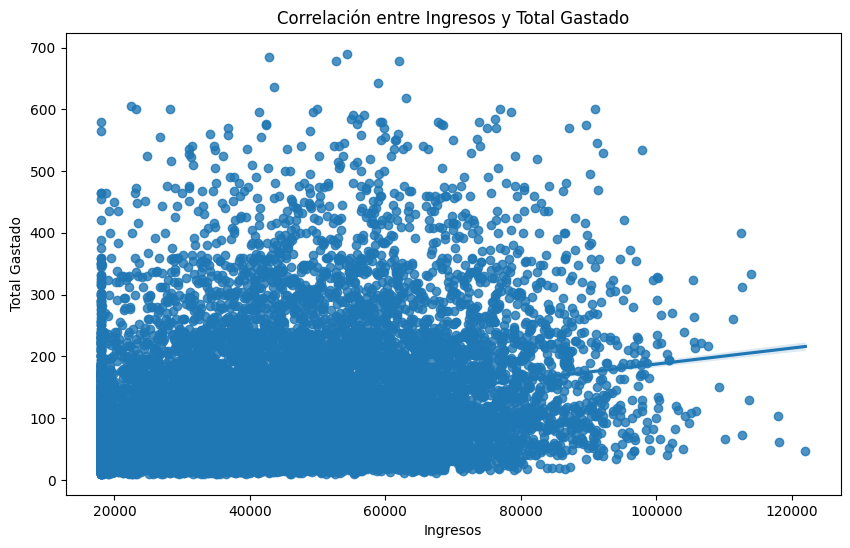

In [25]:
plt.figure(figsize=(10, 6))
sns.regplot(x='ingresos', y='total_gastado', data=df) # Added regplot for better visualization
plt.title('Correlación entre Ingresos y Total Gastado')
plt.xlabel('Ingresos')
plt.ylabel('Total Gastado')
plt.show()

### P4. CAC vs LTV por plataforma

In [27]:
cac_ltv_by_platform = df.groupby('plataforma').agg(
    CAC=('costo_adquisicion', 'mean'),
    LTV=('total_gastado', 'mean')
)

cac_ltv_by_platform

,CAC,LTV
plataforma,,
Facebook,25.014014,188.502592
Instagram,17.484212,87.594644
TikTok,12.460716,56.237039


#### 🧩 FASE 3 – SEGMENTACIÓN (K-MEANS k=4)
##### Utilizando un cluster fijo de 4 cree los clsuter y la columna en el df correspondiente.

In [29]:
from sklearn.cluster import KMeans

X = df[['ingresos', 'total_gastado', 'compras']]

kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

df['cluster'] = kmeans.labels_

### P5. Visualiza clusters

In [30]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,fecha_ultima_compra,dias_desde_ultima,recomendaciones,costo_adquisicion,frecuencia_mensual,cluster
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,2024-12-25,97,0,25,0.472441,2
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,2025-03-08,24,0,24,0.555556,0
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,2025-03-05,27,1,16,1.578947,0
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,2025-02-16,44,0,29,0.405405,0
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,2025-02-07,53,0,32,0.361446,2


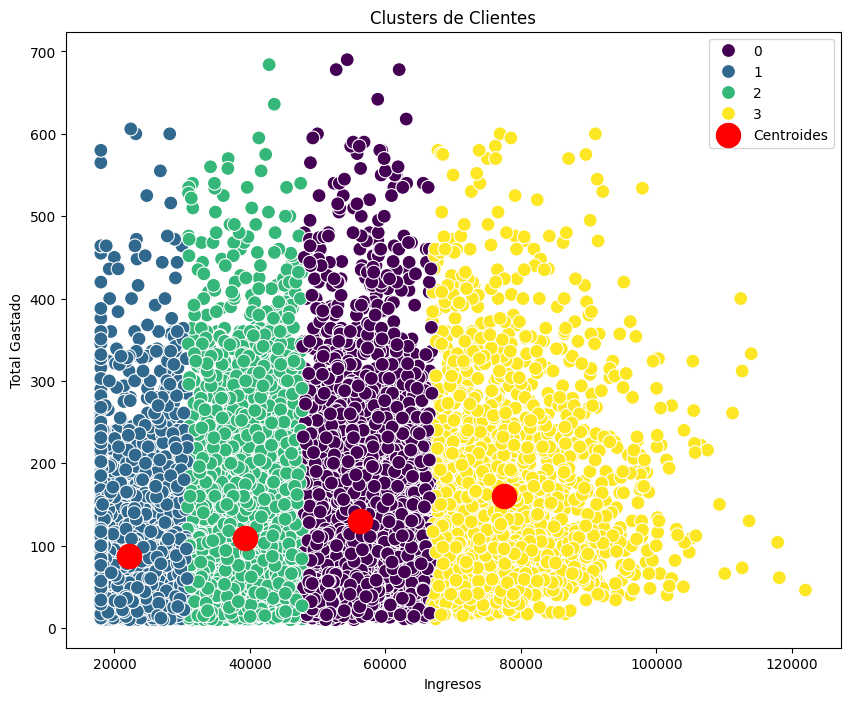

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='ingresos', y='total_gastado', hue='cluster', data=df, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.title('Clusters de Clientes')
plt.xlabel('Ingresos')
plt.ylabel('Total Gastado')
plt.legend()
plt.show()

In [33]:
df['ganancia'] = df['total_gastado'] - df['costo_adquisicion']
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,fecha_ultima_compra,dias_desde_ultima,recomendaciones,costo_adquisicion,frecuencia_mensual,cluster,ganancia
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,2024-12-25,97,0,25,0.472441,2,203
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,2025-03-08,24,0,24,0.555556,0,64
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,2025-03-05,27,1,16,1.578947,0,53
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,2025-02-16,44,0,29,0.405405,0,18
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,2025-02-07,53,0,32,0.361446,2,70


#### CREA LA COLUMNA gananancia resultante entre el ltv- CAC

In [34]:
average_profit_by_cluster = df.groupby('cluster')['ganancia'].mean()

average_profit_by_cluster

,ganancia
cluster,
0,109.157635
1,70.935034
2,90.601822
3,137.723427


### P6. Ganancia promedio por cluster

cluster
0    4060
1    4156
2    4940
3    1844
Name: cluster, dtype: int64


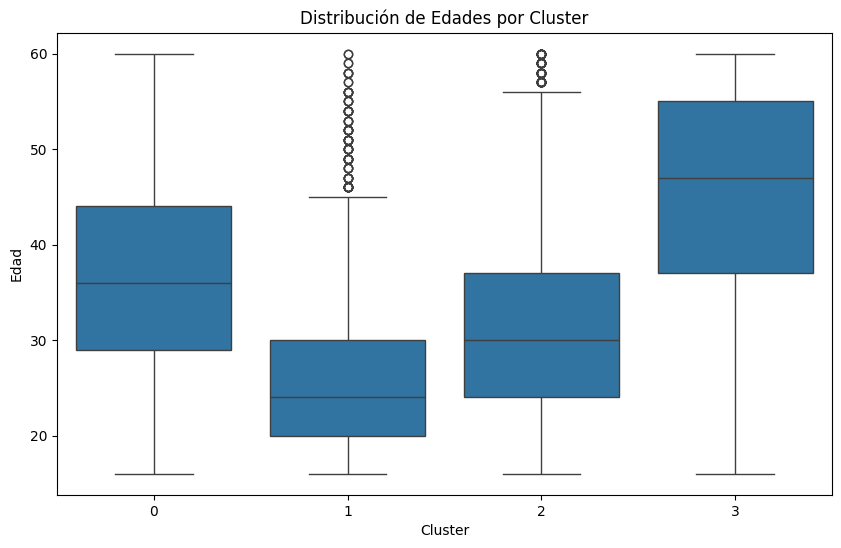

              edad      ingresos  total_gastado   compras  costo_adquisicion  \
cluster                                                                        
0        36.750246  56187.811576     129.475369  2.334483          20.317734   
1        26.037295  22244.669394      87.381136  2.313282          16.446102   
2        31.075304  39307.973279     108.759514  2.336842          18.157692   
3        45.565076  77473.482104     160.580803  2.364425          22.857375   

           ganancia  
cluster              
0        109.157635  
1         70.935034  
2         90.601822  
3        137.723427  


plataforma,Facebook,Instagram,TikTok
cluster,,,
0,1939,1497,624
1,520,1983,1653
2,1379,2190,1371
3,1371,379,94


In [35]:

import matplotlib.pyplot as plt


cluster_sizes = df.groupby('cluster')['cluster'].count()

print(cluster_sizes)

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='edad', data=df)
plt.title('Distribución de Edades por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Edad')
plt.show()

cluster_summary = df.groupby('cluster').agg(
    {'edad': 'mean',
     'ingresos': 'mean',
     'total_gastado': 'mean',
     'compras': 'mean',
     'costo_adquisicion': 'mean',
     'ganancia': 'mean'}
)


print(cluster_summary)

platform_by_cluster = df.groupby(['cluster', 'plataforma']).size().unstack(fill_value=0)
platform_by_cluster


### P7. Género por cluster


In [36]:
gender_by_cluster = df.groupby(['cluster', 'genero']).size().unstack(fill_value=0)

gender_by_cluster

genero,F,M
cluster,,
0,2049,2011
1,2002,2154
2,2485,2455
3,929,915


### P8. Plataforma por cluster


In [37]:
platform_by_cluster = df.groupby(['cluster', 'plataforma']).size().unstack(fill_value=0)

platform_by_cluster

plataforma,Facebook,Instagram,TikTok
cluster,,,
0,1939,1497,624
1,520,1983,1653
2,1379,2190,1371
3,1371,379,94


<Figure size 1000x600 with 0 Axes>

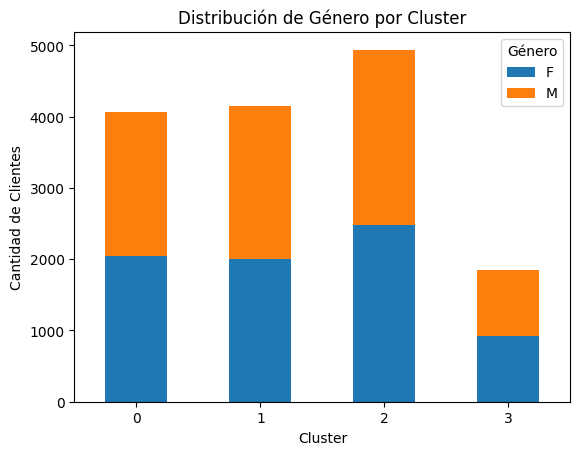

<Figure size 1000x600 with 0 Axes>

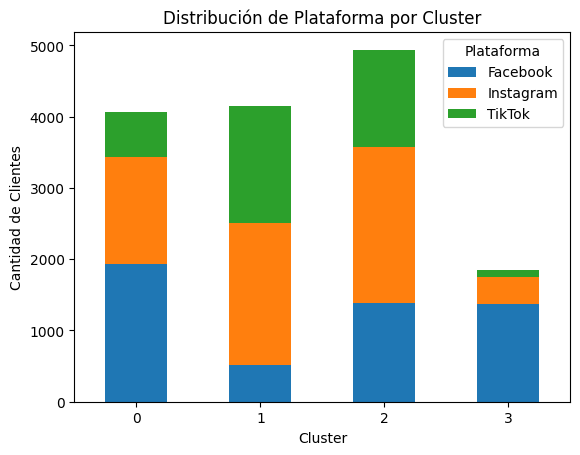

In [38]:
plt.figure(figsize=(10, 6))
gender_by_cluster.plot(kind='bar', stacked=True)
plt.title('Distribución de Género por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Género')
plt.show()

plt.figure(figsize=(10, 6))
platform_by_cluster.plot(kind='bar', stacked=True)
plt.title('Distribución de Plataforma por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Plataforma')
plt.show()

### 📝 FASE 5 – PROFILING & NAMING

#### P9. Asigna un nombre a cada cluster y describe en 2-3 líneas su perfil.


Cluster 0 – Clientes fieles Estos son clientes frecuentes, que tiene alto gasto y un promedio acumulado alto al igual que una alta tasa de retención.

Cluster 1 – Clientes con potencial Estos clientes son recientes y tienen un buen ticket promedio, pero tienen una baja frecuencia.
Cluster 2 – Clientes intermitentes Estos son clientes inactivos o que han comprado solo una vez.  
Cluster 3 –


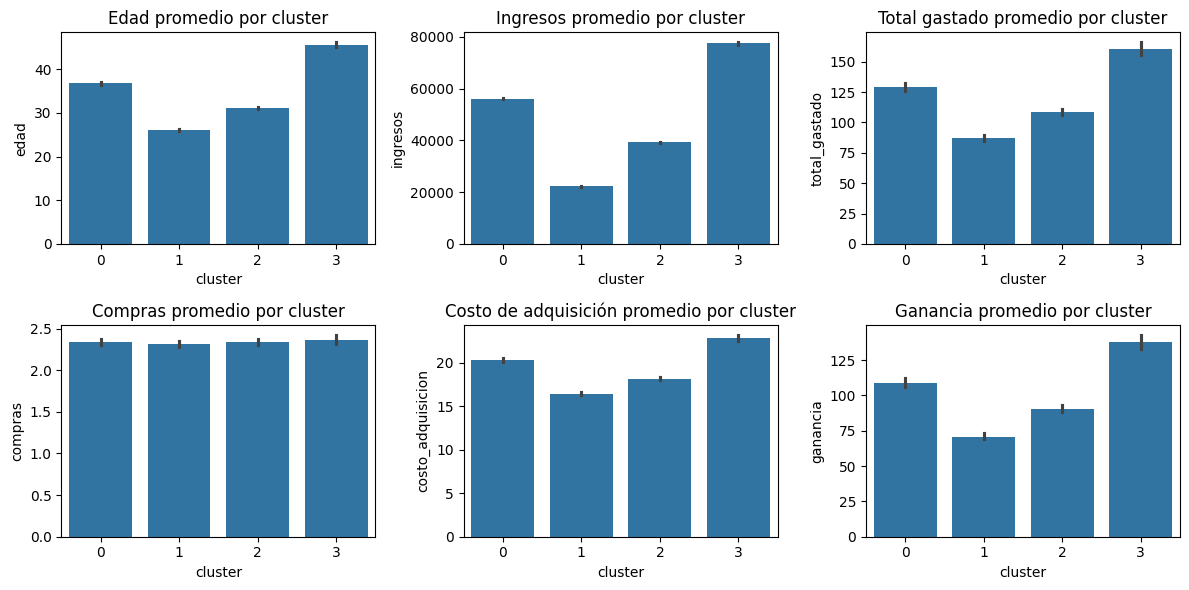

In [40]:
plt.figure(figsize=(12, 6))


plt.subplot(2, 3, 1)
sns.barplot(x='cluster', y='edad', data=df)
plt.title('Edad promedio por cluster')

plt.subplot(2, 3, 2)
sns.barplot(x='cluster', y='ingresos', data=df)
plt.title('Ingresos promedio por cluster')

plt.subplot(2, 3, 3)
sns.barplot(x='cluster', y='total_gastado', data=df)
plt.title('Total gastado promedio por cluster')

plt.subplot(2, 3, 4)
sns.barplot(x='cluster', y='compras', data=df)
plt.title('Compras promedio por cluster')

plt.subplot(2, 3, 5)
sns.barplot(x='cluster', y='costo_adquisicion', data=df)
plt.title('Costo de adquisición promedio por cluster')

plt.subplot(2, 3, 6)
sns.barplot(x='cluster', y='ganancia', data=df)
plt.title('Ganancia promedio por cluster')


plt.tight_layout()
plt.show()

### 💡 FASE 6 – DECISIÓN DE PRESUPUESTO

#### P10. Con 10 000 USD elige 2 clusters y asigna presupuesto.
#### P11. ¿Qué cluster fidelizarías con bajo costo?
#### P12. Enumera 2 riesgos o limitaciones del análisis.

### ENTREGA FINAL
#### Resumen ejecutivo (máx 1 página) con:
##### – Nombres y descripciones de los 4 clusters
##### – Tabla LTV, CAC, Ganancia, tamaño
##### – Plan de inversión y justificación
#### Comentarios sobre cómo mejorarías el dataset o la metodología

**Resumen Ejecutivo**
 Nombres y descripciones de los 4 clusters:
 Cluster 1: